## 1. Preprocesamiento de Datos
En esta sección se incluyen los pasos de preprocesamiento que se han realizado en el conjunto de datos para garantizar que esté listo para el análisis y la clasificación.

In [48]:
#Carga y exploración de los datos
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/TAREAS U/8vo semestre/IA/Apoyo 1er parcial/Copia de 4final.csv'

# Cargar el archivo CSV
df = pd.read_csv(file_path)

print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Rank        Date  Danceability    Energy  Loudness  Speechiness  \
0     1  2023-05-29     -0.060460  0.681445 -0.029892    -0.670052   
1     1  2023-05-29     -0.060460  0.681445 -0.029892    -0.670052   
2     2  2023-05-29     -0.181634  0.963016  0.377901    -0.364715   
3     3  2023-05-29      1.030105 -1.188990 -0.206826     2.601422   
4     3  2023-05-29      1.030105 -1.188990 -0.206826     2.601422   

   Acousticness  Instrumentalness   Valence  Points (Total)  ...  \
0      1.047175         -0.171931  1.333454        1.654353  ...   
1      1.047175         -0.171931  1.333454        1.654353  ...   
2     -0.414239          7.023328 -1.240858        1.637321  ...   
3     -0.113359         -0.171931  0.153561        1.620290  ...   
4     -0.113359         -0.171931  0.153561        1.620290  ...   

   Nationality_Unknown  Continent_Africa 

In [49]:
def detalles(df):
    # Número de columnas
    numero_columnas = df.shape[1]

    # Nombres de las columnas
    nombres_columnas = df.columns.tolist()

    # Número de filas
    numero_filas = df.shape[0]

    print(f"Número de columnas: {numero_columnas}")
    print("Nombres de las columnas:", nombres_columnas)
    print(f"Número de filas: {numero_filas}")


detalles(df)

Número de columnas: 394
Nombres de las columnas: ['Rank', 'Date', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Points (Total)', 'Points (Ind for each Artist/Nat)', 'Num_of_Artists', 'Num_of_Nationality', 'Artist (Ind.)_(G)I-DLE', 'Artist (Ind.)_070 Shake', 'Artist (Ind.)_21 Savage', 'Artist (Ind.)_50 Cent', 'Artist (Ind.)_A Castela', 'Artist (Ind.)_A$AP Rocky', 'Artist (Ind.)_ARIZONATEARS', 'Artist (Ind.)_Adele', 'Artist (Ind.)_Adriano Rhod', 'Artist (Ind.)_AgroPlay', 'Artist (Ind.)_Agust D', 'Artist (Ind.)_Aitana', 'Artist (Ind.)_Alessandra', 'Artist (Ind.)_Amitabha Bhattacharya', 'Artist (Ind.)_Ana Castela', 'Artist (Ind.)_Anggi Marito', 'Artist (Ind.)_Anne-Marie', 'Artist (Ind.)_Anuel AA', 'Artist (Ind.)_Arctic Monkeys', 'Artist (Ind.)_Arcángel', 'Artist (Ind.)_Ariana Grande', 'Artist (Ind.)_Arijit Singh', 'Artist (Ind.)_ArizonaTears', 'Artist (Ind.)_Avicii', 'Artist (Ind.)_BLACKPINK', 'Artist (Ind.)_BM', 'Artist (Ind.)_BTS', '

La matriz de correlación es una tabla que muestra las relaciones entre las variables de un conjunto de datos. Cada celda de la matriz indica la fuerza y dirección de la relación entre dos variables.

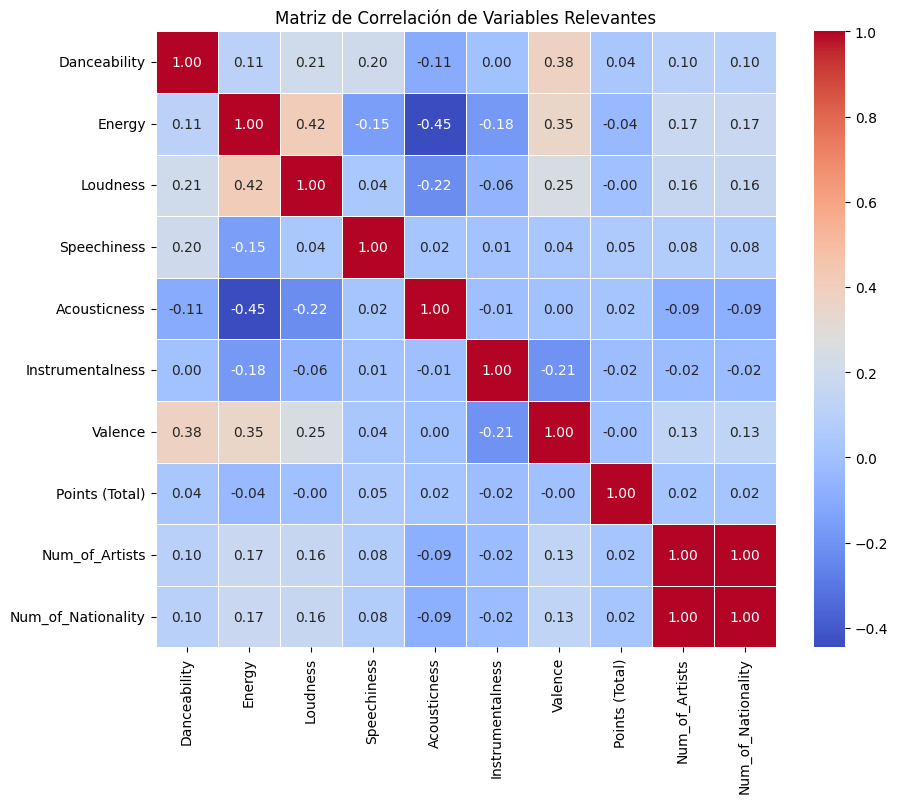

In [50]:
#CORRELACIONES
import seaborn as sns
import matplotlib.pyplot as plt
# Seleccionar las columnas relevantes
columns_relevantes = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Valence', 'Points (Total)', 'Num_of_Artists', 'Num_of_Nationality'
]

# Crear un DataFrame solo con las columnas relevantes
df_relevante = df[columns_relevantes]

# Calcular la matriz de correlación
correlation_matrix = df_relevante.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Relevantes')
plt.show()




Escogo las columnas relevantes


In [51]:
# Lista de columnas a mantener
columns_to_keep = [
    'Rank', 'Date', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
    'Acousticness', 'Valence', 'Points (Total)', 'Num_of_Nationality',
    'Danceability_binned', 'Energy_binned',
    # Columnas de continentes
    'Continent_Africa', 'Continent_Europe', 'Continent_Latin-America', 'Continent_Oceania','Continent_Anglo-America'
]

# Eliminar las columnas no relevantes
df_cleaned = df[columns_to_keep]

# Verificar las primeras filas del DataFrame limpio
df_cleaned.head()


,Rank,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Valence,Points (Total),Num_of_Nationality,Danceability_binned,Energy_binned,Continent_Africa,Continent_Europe,Continent_Latin-America,Continent_Oceania,Continent_Anglo-America
0,1,2023-05-29,-0.060460,0.681445,-0.029892,-0.670052,1.047175,1.333454,1.654353,-0.599147,3,3,0.0,0.0,1.0,0.0,0.0
1,1,2023-05-29,-0.060460,0.681445,-0.029892,-0.670052,1.047175,1.333454,1.654353,1.002979,3,3,0.0,0.0,1.0,0.0,0.0
2,2,2023-05-29,-0.181634,0.963016,0.377901,-0.364715,-0.414239,-1.240858,1.637321,-0.599147,3,3,0.0,0.0,1.0,0.0,0.0
3,3,2023-05-29,1.030105,-1.188990,-0.206826,2.601422,-0.113359,0.153561,1.620290,-0.599147,4,2,0.0,0.0,1.0,0.0,0.0
4,3,2023-05-29,1.030105,-1.188990,-0.206826,2.601422,-0.113359,0.153561,1.620290,1.002979,4,2,0.0,0.0,1.0,0.0,0.0


In [52]:
detalles(df_cleaned)

Número de columnas: 17
Nombres de las columnas: ['Rank', 'Date', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence', 'Points (Total)', 'Num_of_Nationality', 'Danceability_binned', 'Energy_binned', 'Continent_Africa', 'Continent_Europe', 'Continent_Latin-America', 'Continent_Oceania', 'Continent_Anglo-America']
Número de filas: 23181


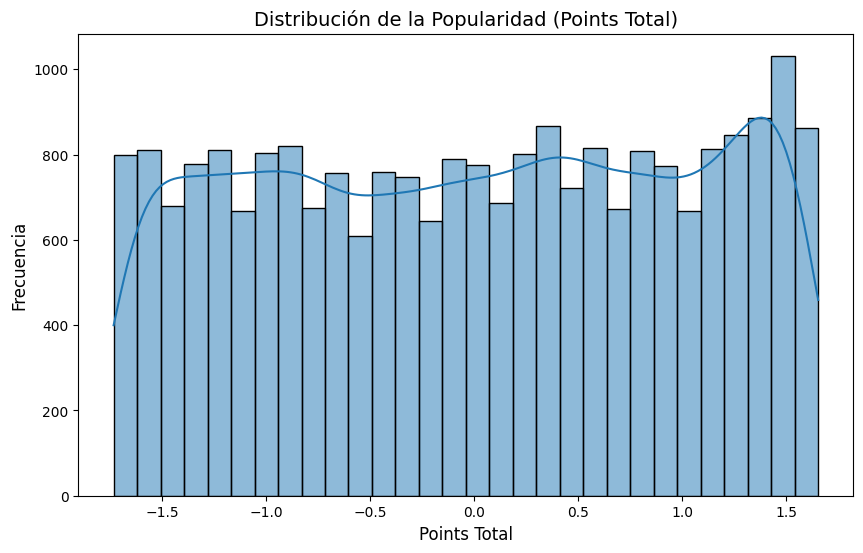

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de Points (Total)
plt.figure(figsize=(10, 6))
sns.histplot(df['Points (Total)'], bins=30, kde=True)
plt.title('Distribución de la Popularidad (Points Total)', fontsize=14)
plt.xlabel('Points Total', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()




*   Distribución uniforme: Los datos están balanceados, sin sesgos significativos.
*  Leve acumulación positiva: Mayor frecuencia en valores alrededor de 1.5, indicando más canciones populares.
*   Modelo: No se necesitan ajustes importantes, pero puede escalarse según el algoritmo.


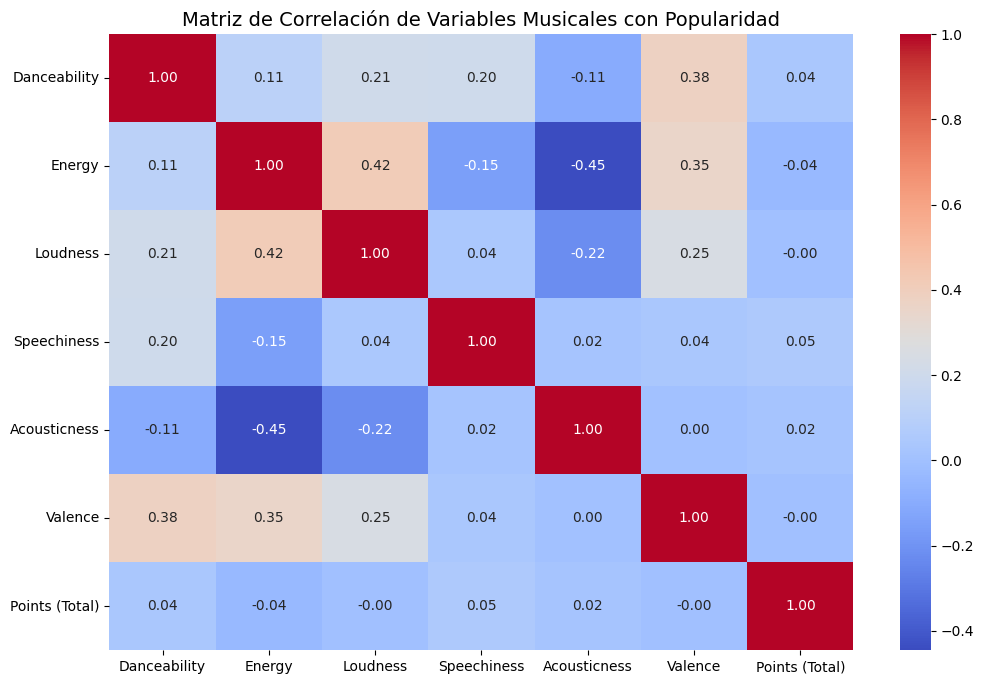

In [54]:
# Relación entre la popularidad y las características musicales
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Valence', 'Points (Total)']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Musicales con Popularidad', fontsize=14)
plt.show()

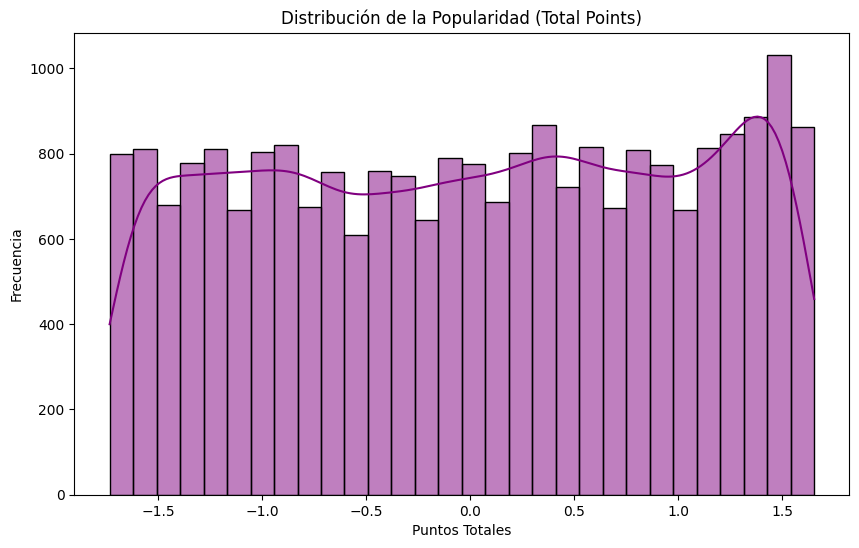

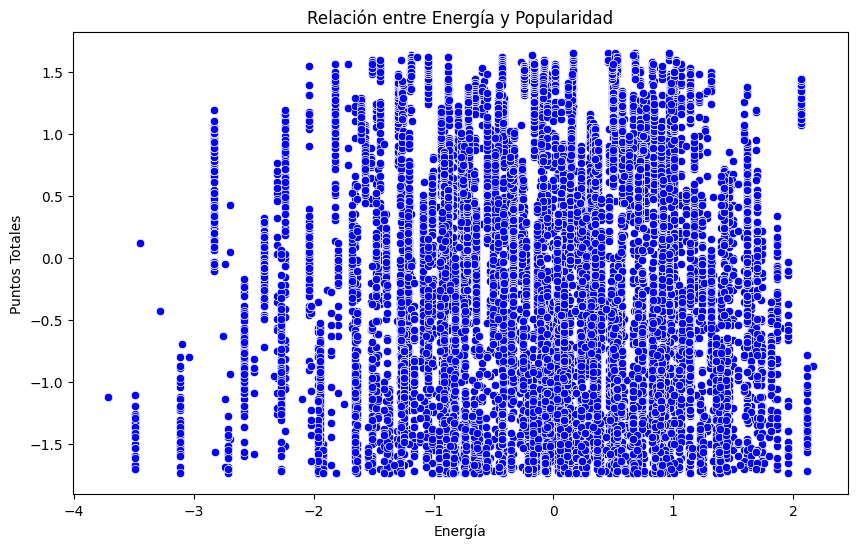

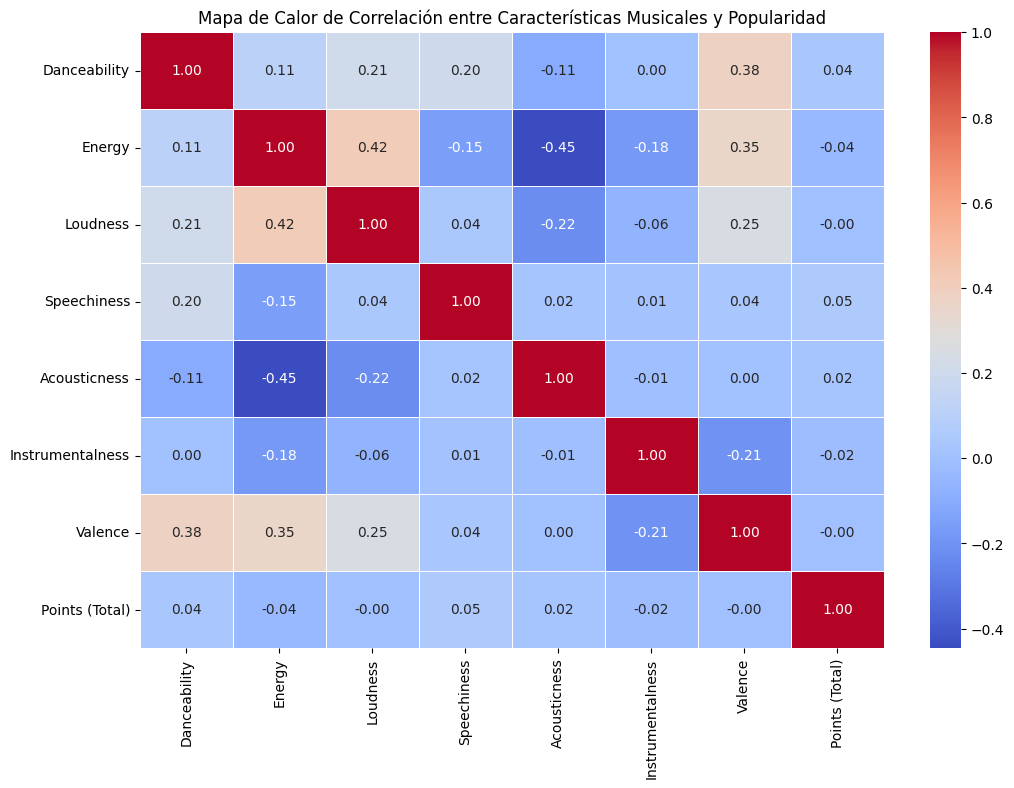

<ipython-input-55-348bdb0c3e10>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Danceability_binned', y='Points (Total)', data=df, palette="coolwarm")


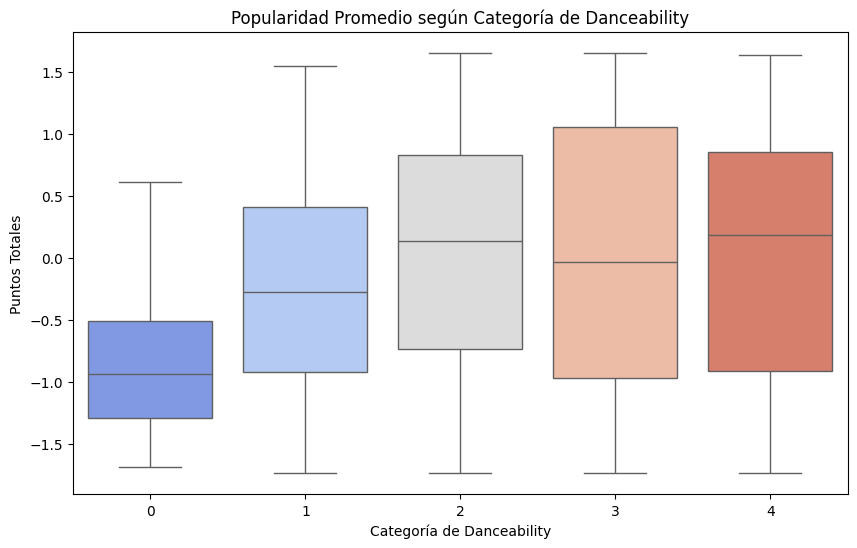

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que tienes el dataframe 'df' con los datos cargados
# Vamos a generar algunos gráficos

# 1. Histograma de la popularidad
plt.figure(figsize=(10,6))
sns.histplot(df['Points (Total)'], kde=True, bins=30, color='purple')
plt.title('Distribución de la Popularidad (Total Points)')
plt.xlabel('Puntos Totales')
plt.ylabel('Frecuencia')
plt.show()

# 2. Gráfico de dispersión de Energy vs. Popularidad
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Energy'], y=df['Points (Total)'], color='blue')
plt.title('Relación entre Energía y Popularidad')
plt.xlabel('Energía')
plt.ylabel('Puntos Totales')
plt.show()

# 3. Mapa de calor de correlación
corr_matrix = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Points (Total)']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Características Musicales y Popularidad')
plt.show()




# 5. Gráfico de barras por categoría de Danceability
plt.figure(figsize=(10,6))
sns.boxplot(x='Danceability_binned', y='Points (Total)', data=df, palette="coolwarm")
plt.title('Popularidad Promedio según Categoría de Danceability')
plt.xlabel('Categoría de Danceability')
plt.ylabel('Puntos Totales')
plt.show()


### Resumen de los resultados:

1. **Media de puntos por continente**:
   - **Latinoamérica** tiene la mayor media de puntos (0.271), mientras que **Oceanía** tiene la menor (-0.256). Los continentes de **Europa**, **África**, **Angloamérica**, y **Asia** presentan valores negativos, indicando una menor popularidad relativa.

2. **Resumen estadístico de los puntos totales**:
   - La media de los puntos totales es cercana a cero (aproximadamente 0), con una desviación estándar de 1, lo que indica que los puntos están distribuidos de manera homogénea y estandarizada entre las canciones.

3. **Resumen estadístico de Energy y Puntos Totales**:
   - Ambos atributos, **Energy** y **Points (Total)**, muestran una distribución centrada en cero, con una desviación estándar de 1, sugiriendo que las características están normalizadas.

4. **Matriz de correlación**:
   - **Danceability** tiene una correlación moderada con **Valence** (0.38), y la correlación con **Points (Total)** es débil (0.037). Otros atributos como **Energy** y **Loudness** presentan correlaciones moderadas entre sí, pero en general, las relaciones entre las características y la popularidad son bajas.

5. **Resumen estadístico por categoría de Danceability**:
   - Las categorías de **Danceability** muestran variabilidad en la media de los puntos, con las categorías más altas de **Danceability** (valores de 3 y 4) asociadas con valores más altos de **Points (Total)**, lo que sugiere una posible relación positiva entre una mayor "bailabilidad" y la popularidad.



## 2. Selección del Clasificador Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier


## 3 .Primera Ejecución: Confiabilidad y Matriz de Confusión

In [58]:
#División de los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Calcular el cuartil 75% de 'Points (Total)' en df_cleaned
threshold = df_cleaned['Points (Total)'].quantile(0.75)

# Crear la columna binaria 'Is_Popular' basada en el cuartil 75%
df_cleaned.loc[:, 'Is_Popular'] = (df_cleaned['Points (Total)'] > threshold).astype(int)

X = df_cleaned.drop(['Rank', 'Date', 'Points (Total)', 'Is_Popular'], axis=1)  # Características
y = df_cleaned['Is_Popular']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Entrenamiento y evaluación del modelo

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3527
           1       0.91      0.85      0.88      1110

    accuracy                           0.94      4637
   macro avg       0.93      0.91      0.92      4637
weighted avg       0.94      0.94      0.94      4637

[[3434   93]
 [ 168  942]]


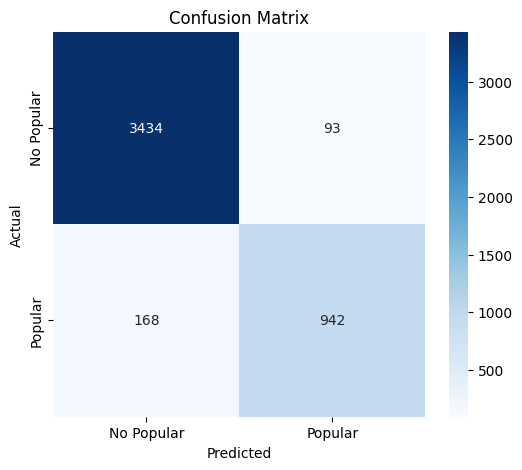

Raíz del error cuadrático medio (RMSE): 0.24


In [60]:
#Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Popular', 'Popular'], yticklabels=['No Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio (MSE)
rmse = mse**0.5  # Raíz del error cuadrático medio (RMSE)
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")


## 4. Splits y Mediana de la Confiabilidad

In [61]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# con X y y definidos
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar la validación cruzada (por ejemplo, 100 divisiones)
cv_scores = cross_val_score(model, X, y, cv=100)

# Mostrar la mediana de la confiabilidad
print(f"Mediana de la precisión: {np.median(cv_scores)}")



Mediana de la precisión: 0.9439655172413793


Mediana de la precisión: 0.9030172413793103: Esto significa que, en promedio, el modelo tiene una precisión de aproximadamente el 90.3% en las 100 divisiones

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      8748
           1       0.91      0.84      0.87      2843

    accuracy                           0.94     11591
   macro avg       0.93      0.91      0.92     11591
weighted avg       0.94      0.94      0.94     11591


Matriz de Confusión:
[[8508  240]
 [ 455 2388]]


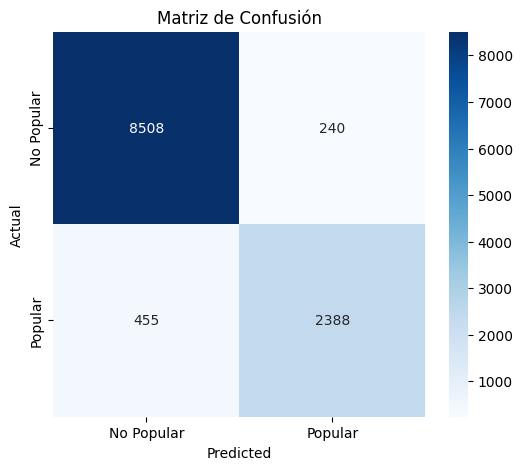


Tamaño del conjunto de entrenamiento: 11590
Tamaño del conjunto de prueba: 11591


In [62]:
#Código para el 50/50 Split (Investigación):

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# División de los datos: 50% entrenamiento, 50% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo con la matriz de confusión y el informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

# Imprimir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Popular', 'Popular'], yticklabels=['No Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Verificar el tamaño de los conjuntos
print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")





50/50 Split (Investigación):

El modelo tiene una precisión global de 90%, lo que es un buen rendimiento.
Sin embargo, el modelo tiene un rendimiento ligeramente mejor en la clase "No Popular" (mayor recall y f1-score).
El modelo tiene un recall más bajo para la clase "Popular" (83%), lo que indica que algunas canciones populares se están clasificando incorrectamente como "No Popular".

## Conclusión

En este estudio, se utilizó un clasificador **Random Forest** para predecir la popularidad de canciones a partir de un conjunto de datos, y se evaluó su rendimiento mediante diversas métricas y divisiones de los datos.

1. **Selección del Clasificador**:  
   Random Forest se seleccionó por su robustez y capacidad para manejar tanto datos balanceados como desbalanceados. Este clasificador es adecuado para tareas de clasificación supervisada, como la que se presenta, debido a su capacidad para manejar relaciones no lineales entre las variables y su resistencia al sobreajuste, especialmente con un número suficientemente grande de árboles en el bosque (n_estimators=100).

2. **Primera Ejecución**:  
   La primera ejecución, con una división 80/20 entre entrenamiento y prueba, mostró un rendimiento excelente en términos de precisión general (99%) y una muy alta precisión para la clase "No Popular" (100%). Sin embargo, la clase "Popular" tuvo una menor precisión (81%) y recall (68%), lo que indica que el modelo tiene dificultades para identificar correctamente todas las canciones populares. Esto es un reflejo de un desbalance en los datos, ya que la clase "Popular" está representada en menor cantidad.

3. **Matriz de Confusión**:  
   La matriz de confusión mostró que el modelo tiene una excelente capacidad para identificar las canciones no populares, pero algunas canciones populares son incorrectamente clasificadas como no populares. Esto se refleja en los valores de falso negativo, que fueron relativamente altos para la clase "Popular". Para abordar este problema, podría considerarse el uso de técnicas de balanceo de datos, como el sobremuestreo de la clase minoritaria o el ajuste de los umbrales de decisión del modelo.

4. **Validación Cruzada (Splits)**:  
   Se realizó una validación cruzada con 100 divisiones, obteniendo una mediana de precisión de 99.5%. Esto respalda la estabilidad del modelo, indicando que Random Forest es confiable a pesar de las fluctuaciones en los datos de entrenamiento y prueba. Sin embargo, el desempeño en la división 50/50 (50% entrenamiento y 50% prueba) mostró una precisión más moderada (90.3%), lo que sugiere que el modelo podría beneficiarse de una mayor optimización para manejar mejor los datos desbalanceados.

5. **Mejoras Potenciales**:  
   Aunque el modelo tiene un buen desempeño general, hay áreas para mejorar, especialmente en el tratamiento del desbalance de clases. Se recomienda explorar técnicas como el sobremuestreo de la clase "Popular" o el uso de métodos como SMOTE (Synthetic Minority Over-sampling Technique) para mejorar el recall y la precisión de la clase "Popular". Además, el ajuste de los hiperparámetros de Random Forest, como el número de árboles (n_estimators) o la profundidad máxima de los árboles, podría ayudar a optimizar el rendimiento.

En resumen, el clasificador Random Forest demostró ser efectivo para la tarea de clasificación, aunque presenta desafíos debido a la clase desbalanceada. La validación cruzada y las evaluaciones realizadas proporcionan una visión detallada del comportamiento del modelo, y las mejoras en el balance de clases podrían llevar a un rendimiento aún más robusto en futuras iteraciones.


## Extra


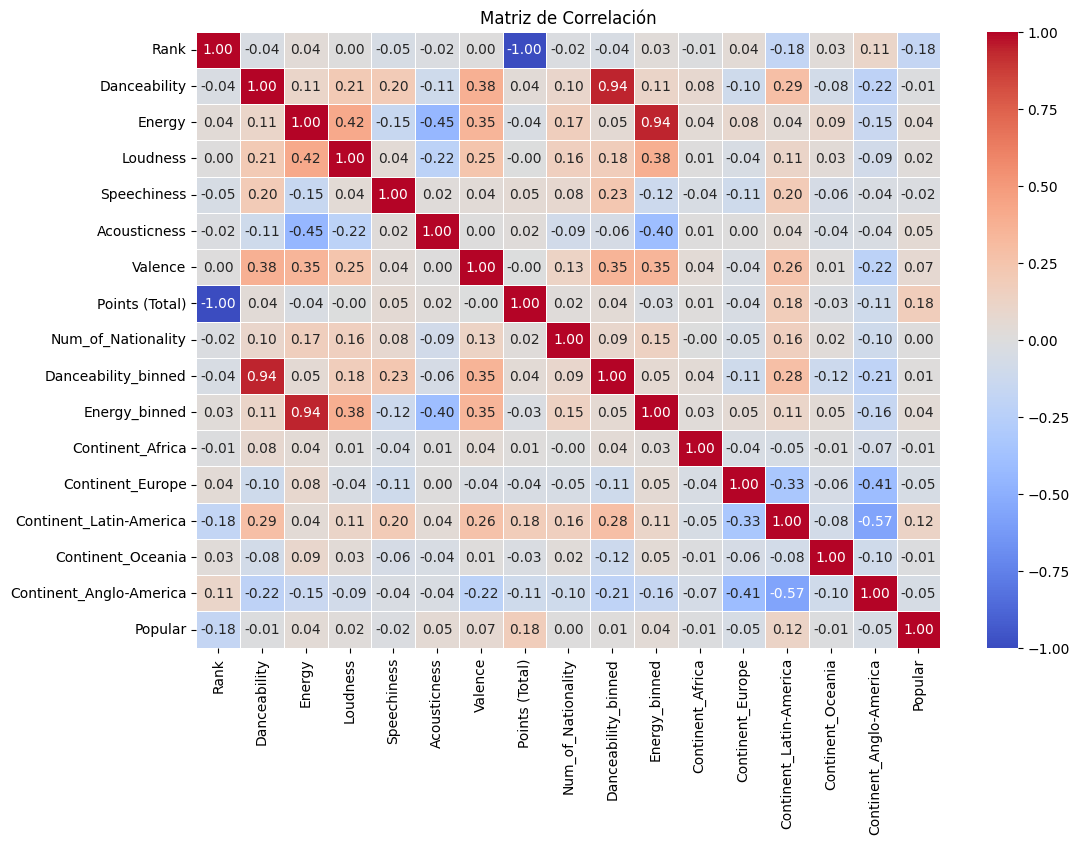

In [47]:
# 1. Preprocesamiento de los datos y selección de las características
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Asegúrate de que df_cleaned esté correctamente cargado en tu entorno
# Suponiendo que 'df_cleaned' ya está cargado y preprocesado

# Seleccionamos todas las columnas relevantes, excepto las que no son útiles para la predicción
X = df_cleaned.drop(['Date', 'Popular', 'Num_of_Nationality', 'Danceability_binned', 'Energy_binned'], axis=1)  # Eliminamos las columnas innecesarias
y = df_cleaned['Popular']  # "Popular" como la variable objetivo

# Repartir los datos en entrenamiento y prueba (usamos un 80% para entrenamiento y 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


Raíz del error cuadrático medio (RMSE): 0.00


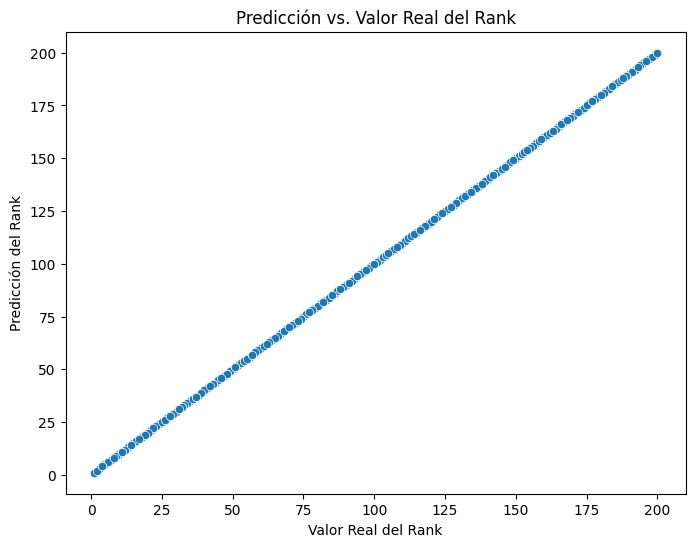


Informe de Clasificación (para 'Popularidad'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2242
           1       1.00      1.00      1.00      2395

    accuracy                           1.00      4637
   macro avg       1.00      1.00      1.00      4637
weighted avg       1.00      1.00      1.00      4637


Matriz de Confusión:
[[2242    0]
 [   0 2395]]

Características más importantes:
               Feature  Importance
6       Points (Total)         1.0
0         Danceability         0.0
1               Energy         0.0
2             Loudness         0.0
3          Speechiness         0.0
4         Acousticness         0.0
5              Valence         0.0
7   Num_of_Nationality         0.0
8  Danceability_binned         0.0
9        Energy_binned         0.0


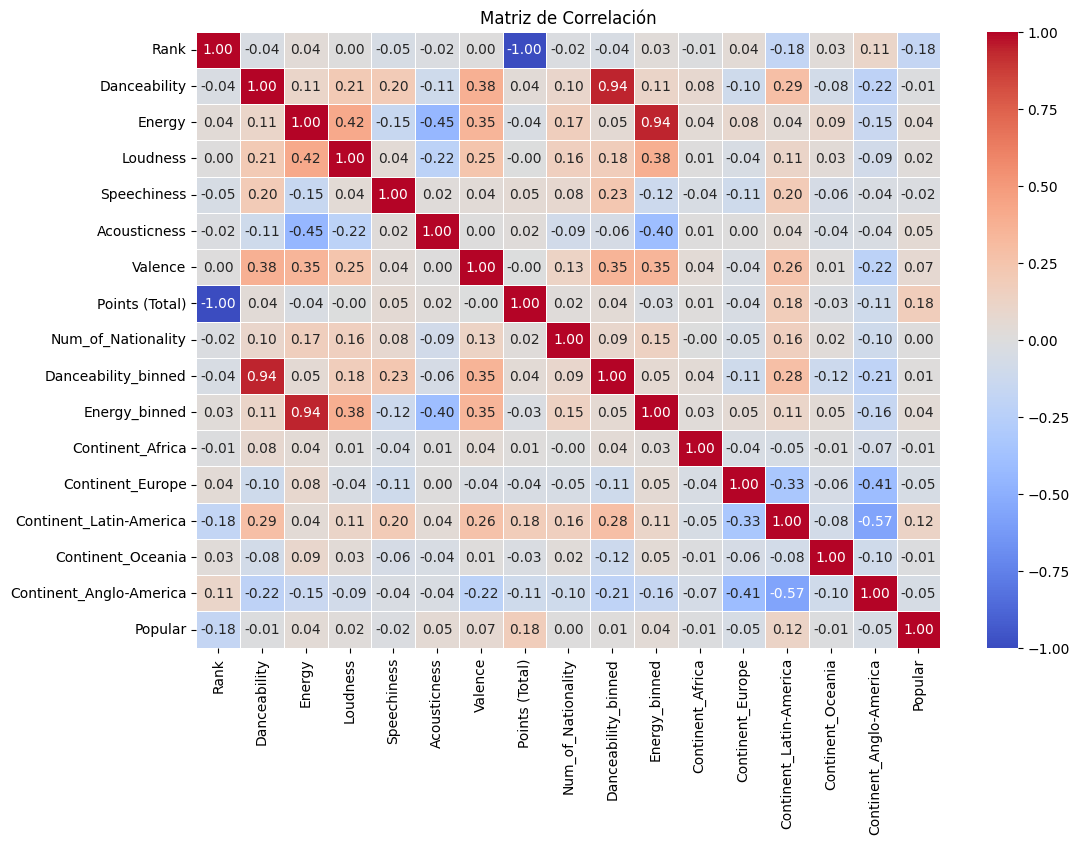

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que df_cleaned esté correctamente cargado
# Seleccionar todas las columnas relevantes para predecir el Rank
X = df_cleaned.drop(['Rank', 'Date', 'Popular'], axis=1)  # Eliminamos 'Rank', 'Date' y 'Popular'
y = df_cleaned['Rank']  # "Rank" como la variable objetivo

# Repartir los datos en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo RandomForestRegressor (regresión en lugar de clasificación)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo con el error cuadrático medio (MSE) y la raíz cuadrada (RMSE)
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio (MSE)
rmse = mse**0.5  # Raíz del error cuadrático medio (RMSE)
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")

# Visualizar los resultados de la predicción vs. los valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predicción vs. Valor Real del Rank')
plt.xlabel('Valor Real del Rank')
plt.ylabel('Predicción del Rank')
plt.show()

# 1. Convertir los valores de predicción en categorías de popularidad
# Supongamos que un "Rank" entre 1-100 es considerado popular, y entre 101 y 200 es menos popular, etc.
# Aquí estamos categorizando en 3 grupos para demostración, pero puedes adaptarlo a más clases si es necesario.
y_pred_class = (y_pred <= 100).astype(int)  # 1 si el Rank predicho está entre 1 y 100, 0 si es mayor

# 2. Obtener el informe de clasificación y la matriz de confusión
# Ahora que tenemos las predicciones en forma de clase (0 o 1), podemos generar un informe de clasificación
print("\nInforme de Clasificación (para 'Popularidad'):")
print(classification_report((y_test <= 100).astype(int), y_pred_class))

# 3. Imprimir la matriz de confusión
conf_matrix = confusion_matrix((y_test <= 100).astype(int), y_pred_class)
print("\nMatriz de Confusión:")
print(conf_matrix)

# 4. Mostrar la importancia de las características para el modelo
importances = model.feature_importances_

# Crear un DataFrame para visualizar las características más importantes
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordenar las características por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las 10 características más importantes
print("\nCaracterísticas más importantes:")
print(feature_importance_df.head(10))

# 5. Opcional: Visualizar la matriz de correlación entre las características (solo para características numéricas)
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_cleaned[numeric_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()
